### Crear las siguientes distribuciones
# Binomial (n=25, p=.70)
# Uniforme para un dado de 6 caras
# Exponencial(Teta=10)


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
binomial = stats.binom(25,0.7)
uniforme = stats.randint(low = 1, high = 7)
exponencial = stats.expon(10)

### Para cada una de las distribuciones anteriores:

### Generar una muestra grande (200 o más)

In [7]:
np.random.seed(100)

In [16]:
muestra_binomial = binomial.rvs(300)
muestra_uniforme = uniforme.rvs(300)
muestra_exponencial = exponencial.rvs(300)

### Tomar 100 muestras bootstrap de la muestra original

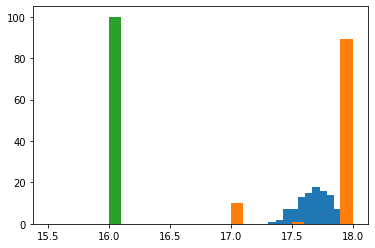

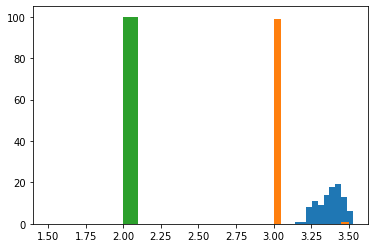

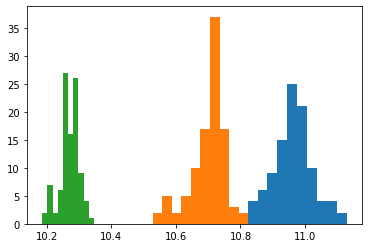

In [18]:
def bootstrap (datos,muestras = 100):
    sample = []
    media = []
    mediana = []
    p_23 = []

    for i in range (muestras):
        sample = np.random.choice(datos,size=len(datos), replace = True)
        media.append(np.mean(sample))
        mediana.append(np.median(sample))
        p_23.append(np.percentile(sample,23))

    fig, ax = plt.subplots()
    ax.hist(media, label = "Media")
    ax.hist(mediana, label = "Mediana")
    ax.hist(p_23, label = "Media")

bootstrap(muestra_binomial)
bootstrap(muestra_uniforme)
bootstrap(muestra_exponencial)

# La empresa X quiere averiguar si el cambio a monitores Apple aumenta la productividad de sus programadores. Se elige una muestra aleatoria de 25 personas y se les cambia el monitor. La diferencia entre su productividad antes y después del cambio de monitor se encuentra en el documento “productivity.txt”

In [19]:
documento = open("productivity.txt")

In [20]:
muestras = documento.readlines()

In [21]:
muestras

['-1.910000000000000142e+01\n',
 '-1.519999999999999929e+01\n',
 '-1.240000000000000036e+01\n',
 '-1.539999999999999858e+01\n',
 '-8.699999999999999289e+00\n',
 '-6.699999999999999289e+00\n',
 '-5.899999999999999467e+00\n',
 '-3.500000000000000000e+00\n',
 '-3.099999999999999645e+00\n',
 '-2.099999999999999645e+00\n',
 '4.200000000000001066e+00\n',
 '6.099999999999999645e+00\n',
 '7.000000000000001776e+00\n',
 '9.099999999999999645e+00\n',
 '1.000000000000000178e+01\n',
 '1.029999999999999893e+01\n',
 '1.320000000000000107e+01\n',
 '1.009999999999999964e+01\n',
 '1.409999999999999964e+01\n',
 '1.440000000000000036e+01\n',
 '2.010000000000000142e+01\n',
 '2.629999999999999716e+01\n',
 '2.769999999999999574e+01\n',
 '2.219999999999999574e+01\n',
 '2.339999999999999858e+01\n']

In [22]:
muestras = np.array(muestras).astype(np.float)

In [23]:
muestras

array([-19.1, -15.2, -12.4, -15.4,  -8.7,  -6.7,  -5.9,  -3.5,  -3.1,
        -2.1,   4.2,   6.1,   7. ,   9.1,  10. ,  10.3,  13.2,  10.1,
        14.1,  14.4,  20.1,  26.3,  27.7,  22.2,  23.4])

### Crear una función bootstrap_ci para calcular el intervalo de confianza de cualquier estadística muestral (en este caso la media). La función debe tomar una muestra, una función que calcule el estadístico muestral, el número de remuestreos (por defecto: 10000) y el nivel de confianza (por defecto: 0,95). La función deberá devolver los límites inferior y superior del intervalo de confianza y la distribución bootstrap de la estadística muestral.

In [29]:
def bootstrap_ci(datos,funcion = np.mean, resamples=10000, ci = 95):
    estadisticas = np.zeros(resamples)
    for i in range(resamples):
        bootstrap = np.random.choice(datos,len(datos),replace=True)
        estadisticas = funcion(bootstrap)
    limite_inferior = (100-ci)/2
    return np.percentile(estadisticas,limite_inferior),funcion(datos), np.percentile(estadisticas,100-limite_inferior),estadisticas
lower,estimate,upper,bootstraps = bootstrap_ci(muestras)

In [30]:
lower, estimate, upper

(6.731999999999999, 5.044, 6.731999999999999)

### Representar la distribución bootstrap de las medias en un histograma.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([6.232, 6.332, 6.432, 6.532, 6.632, 6.732, 6.832, 6.932, 7.032,
        7.132, 7.232]),
 <BarContainer object of 10 artists>)

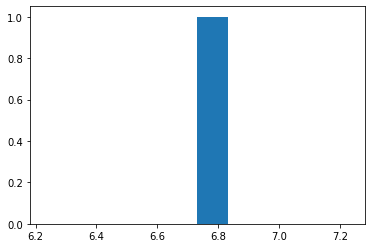

In [31]:
plt.hist(bootstraps)